**1.Business Understanding**

Determine the business or research objectives. In this case, the goal could be to predict whether a passenger survived the Titanic disaster based on various features.Understand the potential impact of the analysis, such as improving safety measures or gaining historical insights.
Please find the attached dataset of Titanic disaster: https://www.kaggle.com/datasets/ibrahimelsayed182/titanic-dataset

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 61.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 20.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 62.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 66.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 74.1 MB/s eta 0:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# URL to the dataset (available in the UCI repository)
# Load the dataset
data= pd.read_csv('//content/drive/MyDrive/Pycaret_Assignment/Titanic.csv')

**2. Data Understanding**

Gather data: Collect the Titanic dataset, which includes information on passengers such as age, gender, class, ticket fare, etc.
Explore data: Examine the dataset to understand its structure, data types, and initial patterns or insights. This may involve summary statistics and data visualization.

In [ ]:
# Display rows and information
data_head = data.head()
data_info = data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       891 non-null    object 
 1   age       714 non-null    float64
 2   sibsp     891 non-null    int64  
 3   parch     891 non-null    int64  
 4   fare      891 non-null    float64
 5   embarked  889 non-null    object 
 6   class     891 non-null    object 
 7   who       891 non-null    object 
 8   alone     891 non-null    bool   
 9   survived  891 non-null    int64  
dtypes: bool(1), float64(2), int64(3), object(4)
memory usage: 63.6+ KB


In [ ]:
data_head


,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,male,22.0,1,0,7.2500,S,Third,man,False,0
1,female,38.0,1,0,71.2833,C,First,woman,False,1
2,female,26.0,0,0,7.9250,S,Third,woman,True,1
3,female,35.0,1,0,53.1000,S,First,woman,False,1
4,male,35.0,0,0,8.0500,S,Third,man,True,0


In [ ]:
data_description = data.describe(include='all')
data_description

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
count,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,891.000000
unique,2,NaN,NaN,NaN,NaN,3,3,3,2,NaN
top,male,NaN,NaN,NaN,NaN,S,Third,man,True,NaN
freq,577,NaN,NaN,NaN,NaN,644,491,537,537,NaN
mean,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,0.383838
std,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,0.486592
min,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000
25%,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,0.000000
50%,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,0.000000
75%,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,1.000000


### **3. Data Preparation**
Before we proceed, let's:

Rename the columns for clarity.

Visualize the data distributions for each species to better understand the relationships between the features.

In [ ]:
data.columns = ['gender', 'age', 'sibsp', 'parch','fare','embarked','class','person', 'single', 'survive?']
data_head_renamed = data.head()
data_head_renamed

,gender,age,sibsp,parch,fare,embarked,class,person,single,survive?
0,male,22.0,1,0,7.2500,S,Third,man,False,0
1,female,38.0,1,0,71.2833,C,First,woman,False,1
2,female,26.0,0,0,7.9250,S,Third,woman,True,1
3,female,35.0,1,0,53.1000,S,First,woman,False,1
4,male,35.0,0,0,8.0500,S,Third,man,True,0


let's visualize the distribution of the features for each species to understand their relationships. We'll use pair plots to do this, which show pairwise relationships in a dataset.

By using pair plots, we can immediately see the distributions of single variables and relationships between two variables.

KeyError: ignored

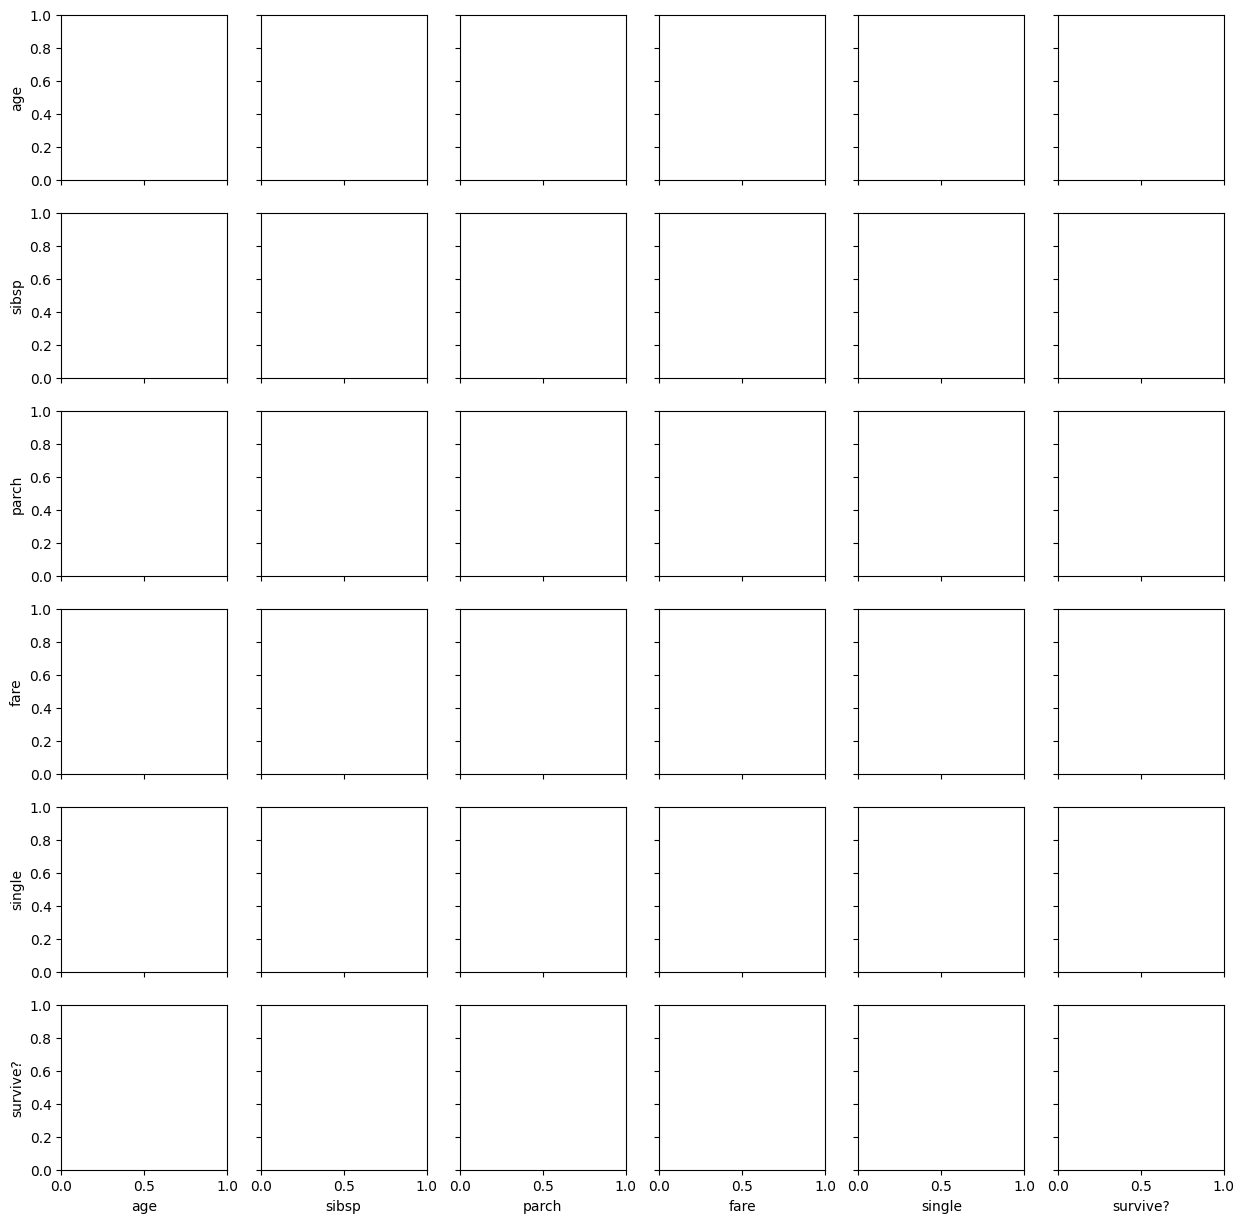

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# plots for distribution of features for each species
sns.pairplot(data, hue="survive", palette="husl", markers=["o", "s", "D"])
plt.suptitle('Pair Plots of Features by Species', y=1.02)
plt.show()

**observations**:

Iris-setosa is easily distinguishable from the other two species based on its sepal and petal measurements. It tends to have smaller petal lengths and widths.
Iris-versicolor and the third species (which appears to be Iris-virginica based on the well-known nature of this dataset) are more closely related in terms of petal and sepal measurements. However, they can still be separated to some extent, especially based on petal length and width.
There are clear clusters in the scatter plots, indicating that a classification model should be able to distinguish between these species.

# **4. Modeling**
Given the nature of the dataset and the task (classification), we can use several algorithms. For demonstration purposes, let's use a Decision Tree classifier. We'll start by splitting the data into training and testing sets, and then train the model on the training data.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

#Split the data into training and testing sets
X = iris_data.drop('species', axis=1)
y = iris_data['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Train a Decision Tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

#Predict on the testing set
y_pred = clf.predict(X_test)
y_pred

#Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('accuracy':accuracy)

accuracy : 0.9111111111111111


# **5. Evaluation**

 let's look at a detailed classification report for the further evaluation. This will provide insights into precision, recall, and the F1-score for each class.

In [ ]:
# Generate a classification report
class_report = classification_report(y_test, y_pred, target_names=iris_data['species'].unique())
class_report

'                 precision    recall  f1-score   support\n\n    Iris-setosa       1.00      1.00      1.00        19\nIris-versicolor       0.91      0.77      0.83        13\n Iris-virginica       0.80      0.92      0.86        13\n\n       accuracy                           0.91        45\n      macro avg       0.90      0.90      0.90        45\n   weighted avg       0.92      0.91      0.91        45\n'

## **6. Deployment**
Deployment would involve integrating the trained model into a production system where it can be used for real-time or batch predictions.

***Observations:***

The model perfectly classifies Iris-setosa.
It has a slightly lower recall for Iris-versicolor, which means there were a few instances that were misclassified.
The precision for Iris-virginica is 0.80, indicating that when the model predicts this class, it's correct 80% of the time.

In [ ]:
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

iris_data=iris_data.dropna()
# init setup on exp, our target column is diagnosis
exp.setup(iris_data, target = 'species', session_id = 123)

,Description,Value
0,Session id,123
1,Target,species
2,Target type,Multiclass
3,Target mapping,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2"
4,Original data shape,"(149, 5)"
5,Transformed data shape,"(149, 5)"
6,Transformed train set shape,"(104, 5)"
7,Transformed test set shape,"(45, 5)"
8,Numeric features,4
9,Preprocess,True


In [ ]:
#let compare list of base models that best fit out data
base_models = exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9727,1.0000,0.9727,0.9791,0.9723,0.9589,0.9622,0.7310
knn,K Neighbors Classifier,0.9727,0.9854,0.9727,0.9791,0.9723,0.9589,0.9622,0.0540
qda,Quadratic Discriminant Analysis,0.9718,1.0000,0.9718,0.9789,0.9718,0.9579,0.9614,0.0300
lda,Linear Discriminant Analysis,0.9718,1.0000,0.9718,0.9789,0.9718,0.9579,0.9614,0.0260
lightgbm,Light Gradient Boosting Machine,0.9636,0.9924,0.9636,0.9718,0.9628,0.9450,0.9494,0.5460
nb,Naive Bayes,0.9536,0.9945,0.9536,0.9638,0.9524,0.9296,0.9354,0.0260
et,Extra Trees Classifier,0.9536,0.9936,0.9536,0.9643,0.9528,0.9301,0.9358,0.2190
xgboost,Extreme Gradient Boosting,0.9436,0.9945,0.9436,0.9563,0.9424,0.9147,0.9218,0.0980
dt,Decision Tree Classifier,0.9345,0.9527,0.9345,0.9527,0.9330,0.9019,0.9116,0.0240
rf,Random Forest Classifier,0.9336,0.9945,0.9336,0.9488,0.9324,0.8998,0.9081,0.1650


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
exp.save_model(base_models,'/content/drive/MyDrive/DM-Assignment-2-part2/crisp_dm')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['sepal_length', 'sepal_width',
                                              'petal_length', 'petal_width'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empt...
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                      